
# 📊 Relatório de Análise Exploratória – Taxas de Juros por Instituições Financeiras (BCB)

Este relatório documenta todas as etapas de **tratamento e análise exploratória** de dados sobre as **taxas de juros médias** praticadas por instituições financeiras brasileiras, a partir da API pública do Banco Central do Brasil (BCB).

---

## 📘 Descrição dos Dados

Os dados se referem às taxas de juros médias mensais e anuais, segmentadas por tipo de cliente (**Pessoa Física** ou **Pessoa Jurídica**), modalidade de crédito e instituição. Foram obtidos por meio da API do BCB no intervalo de **janeiro de 2022 a maio de 2025**.

---

## 🔧 Etapas de Tratamento dos Dados

### 🔹 1. Coleta dos Dados

Os dados foram coletados utilizando a função `requestTaxaJuros`, com os parâmetros de data definidos.

```python
df = requestTaxaJuros("2022-01-01", "2025-05-25")
```

### 🔹 2. Padronização de Datas

As colunas `InicioPeriodo` e `FimPeriodo` foram convertidas para o formato `datetime`, facilitando a extração de informações temporais.

```python
df['InicioPeriodo'] = pd.to_datetime(df['InicioPeriodo'])
df['FimPeriodo'] = pd.to_datetime(df['FimPeriodo'])
```

### 🔹 3. Criação de Novas Colunas Temporais

Foram criadas as colunas `Ano`, `Mes` e `AnoMes` para possibilitar análises ao longo do tempo.

```python
df['Ano'] = df['InicioPeriodo'].dt.year
df['Mes'] = df['InicioPeriodo'].dt.month
df['AnoMes'] = df['InicioPeriodo'].dt.to_period('M').astype(str)
```

### 🔹 4. Verificação e Tratamento de Dados Nulos

Verificou-se a presença de dados nulos. A princípio, não foi necessária a exclusão de linhas, mas essa decisão pode ser revista conforme os objetivos da análise.

```python
df.isna().sum()
```

---

## 📊 Análises Exploratórias

### 1. Evolução da Taxa Média de Juros por Mês

Análise da média da `TaxaJurosAoAno` por `AnoMes`, com visualização em gráfico de linha.

```python
df.groupby("AnoMes")["TaxaJurosAoAno"].mean().plot(...)
```

### 2. Comparação PF vs PJ

Análise da taxa de juros ao ano segmentada entre Pessoa Física e Jurídica ao longo do tempo.

```python
df.groupby(["AnoMes", "Segmento"])["TaxaJurosAoAno"].mean().unstack().plot(...)
```

### 3. Modalidades com Maiores Taxas de Juros

Identificação das modalidades de crédito com as maiores taxas médias ao ano.

```python
df.groupby("Modalidade")["TaxaJurosAoAno"].mean().sort_values(ascending=False).plot(...)
```

### 4. Instituições com Maiores Taxas de Juros

Cálculo da média de juros por instituição.

```python
df.groupby("InstituicaoFinanceira")["TaxaJurosAoAno"].mean().sort_values(...)
```

---

## ✅ Conclusão

O tratamento e a análise permitiram identificar **padrões relevantes** nos dados de juros, como:

- **Tendência temporal** das taxas;
- Diferenças claras entre **Pessoa Física e Jurídica**;
- Modalidades e instituições com taxas mais elevadas.

Essas informações são valiosas para comparações financeiras, análise de mercado e embasamento acadêmico.

---


---
## Nesta etapa, importamos as bibliotecas que serão utilizadas para manipulação dos dados e geração de gráficos.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.extractTransform import requestTaxaJuros

---
## Realizamos a extração dos dados de taxa de juros da API do Banco Central, com o recorte entre janeiro de 2022 e maio de 2025. Esse intervalo foi escolhido por conter dados atualizados e suficientes para identificar tendências.


In [32]:
df = requestTaxaJuros("2022-01-01", "2025-05-25")
df.shape


(675499, 11)

---
## Visualizamos as primeiras linhas e os tipos de dados das colunas retornadas pela API. Isso é útil para identificar possíveis conversões e formatos inconsistentes.


In [33]:
df.head()
df.dtypes


InicioPeriodo             object
FimPeriodo                object
codigoSegmento            object
Segmento                  object
codigoModalidade          object
Modalidade                object
Posicao                    int64
InstituicaoFinanceira     object
TaxaJurosAoMes           float64
TaxaJurosAoAno           float64
cnpj8                     object
dtype: object

---
## As colunas de data são convertidas para o tipo `datetime`. Também criamos colunas auxiliares com ano, mês e a combinação `AnoMes` para facilitar agrupamentos e análises temporais.


In [34]:
df['InicioPeriodo'] = pd.to_datetime(df['InicioPeriodo'], errors='coerce')
df['FimPeriodo'] = pd.to_datetime(df['FimPeriodo'], errors='coerce')
df['Ano'] = df['InicioPeriodo'].dt.year
df['Mes'] = df['InicioPeriodo'].dt.month
df['AnoMes'] = df['InicioPeriodo'].dt.to_period('M')


---
## Verificamos se há valores ausentes (nulos) nas colunas. Essa etapa é essencial para decidir se será necessário remover ou preencher valores ausentes.


In [35]:
df.isna().sum()


InicioPeriodo            0
FimPeriodo               0
codigoSegmento           0
Segmento                 0
codigoModalidade         0
Modalidade               0
Posicao                  0
InstituicaoFinanceira    0
TaxaJurosAoMes           0
TaxaJurosAoAno           0
cnpj8                    0
Ano                      0
Mes                      0
AnoMes                   0
dtype: int64

---
## Utilizamos estatísticas descritivas para entender a distribuição das taxas de juros (média, desvio padrão, mínimo, máximo, etc.).


In [36]:
df.describe()


,InicioPeriodo,FimPeriodo,Posicao,TaxaJurosAoMes,TaxaJurosAoAno,Ano,Mes
count,675499,675499,675499.000000,675499.000000,675499.000000,675499.000000,675499.000000
mean,2023-09-06 03:42:50.339852288,2023-09-12 01:05:33.731952384,23.438502,4.515171,99.572790,2023.210610,6.158313
min,2022-01-01 00:00:00,2022-01-07 00:00:00,1.000000,0.000000,0.000000,2022.000000,1.000000
25%,2022-11-03 00:00:00,2022-11-09 00:00:00,10.000000,1.670000,21.980000,2022.000000,3.000000
50%,2023-09-05 00:00:00,2023-09-12 00:00:00,20.000000,2.330000,31.880000,2023.000000,6.000000
75%,2024-07-09 00:00:00,2024-07-15 00:00:00,33.000000,5.700000,94.450000,2024.000000,9.000000
max,2025-05-19 00:00:00,2025-05-23 00:00:00,95.000000,82.210000,133792.510000,2025.000000,12.000000
std,NaN,NaN,17.054763,4.602336,230.089185,0.984132,3.467219


---
### Instituição com maior média de taxa anual

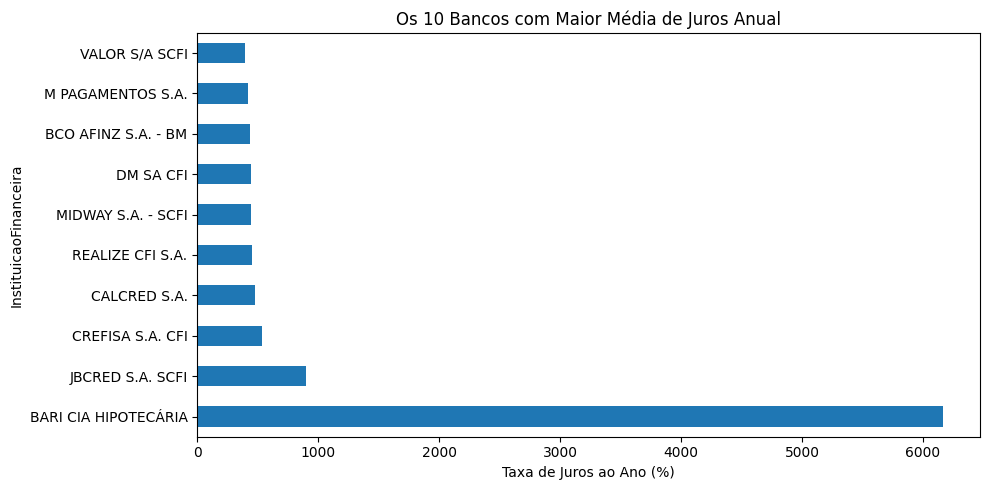

In [37]:
top_bancos = df.groupby('InstituicaoFinanceira')['TaxaJurosAoAno'].mean().sort_values(ascending=False).head(10)

top_bancos.plot(kind='barh', figsize=(10, 5), title='Os 10 Bancos com Maior Média de Juros Anual')
plt.xlabel('Taxa de Juros ao Ano (%)')
plt.tight_layout()
plt.show()

---
### Contagem das modalidades mais frequentes

In [38]:
contagem_modalidades = df['Modalidade'].value_counts().reset_index()
contagem_modalidades.columns = ['Modalidade', 'Quantidade']

# Visualização tabular com destaque
contagem_modalidades.head(10).style.set_caption("Modalidades Mais Frequentes no Mercado") \
    .format(precision=0) \
    .bar(subset=["Quantidade"], color='blue')


,Modalidade,Quantidade
0,Crédito pessoal não-consignado - Pré-fixado,71388
1,Cartão de crédito - rotativo total - Pré-fixado,50996
2,Cartão de crédito - parcelado - Pré-fixado,50741
3,Cheque especial - Pré-fixado,48890
4,Desconto de duplicatas - Pré-fixado,45261
5,Crédito pessoal consignado privado - Pré-fixado,41665
6,Capital de giro com prazo superior a 365 dias - Pré-fixado,39046
7,Capital de giro com prazo até 365 dias - Pré-fixado,37302
8,Aquisição de veículos - Pré-fixado,37037
9,Crédito pessoal consignado público - Pré-fixado,35174


---
### Cálculo de média, variância e desvio padrão das taxas de juros

In [39]:
# Agrupa por modalidade e calcula estatísticas descritivas das taxas de juros
estatisticas_juros = df.groupby('Modalidade')['TaxaJurosAoAno'].agg(
    MediaJuros="mean",
    VarianciaJuros="var",
    DesvioPadraoJuros="std"
).sort_values(by='MediaJuros', ascending=False)

# Formatação visual
estatisticas_juros.head(10).style.set_caption("Estatísticas das Taxas de Juros por Modalidade") \
    .format({
        "MediaJuros": "{:.2f}",
        "VarianciaJuros": "{:.2f}",
        "DesvioPadraoJuros": "{:.2f}"
    }) \
    .background_gradient(cmap="YlOrBr")


,MediaJuros,VarianciaJuros,DesvioPadraoJuros
Modalidade,,,
Financiamento imobiliário com taxas de mercado - Pós-fixado referenciado em IPCA,716.90,80313135.18,8961.76
Cartão de crédito - rotativo total - Pré-fixado,459.12,65167.93,255.28
Cartão de crédito - parcelado - Pré-fixado,195.92,15121.62,122.97
Cheque especial - Pré-fixado,170.79,11996.72,109.53
Crédito pessoal não-consignado - Pré-fixado,148.53,31563.45,177.66
Conta garantida - Pré-fixado,68.49,5148.37,71.75
Aquisição de outros bens - Pré-fixado,53.77,1639.79,40.49
Capital de giro com prazo até 365 dias - Pré-fixado,45.27,2169.15,46.57
Desconto de cheques - Pré-fixado,39.03,470.02,21.68


---
### Média geral da taxa de juros por Mês/Ano

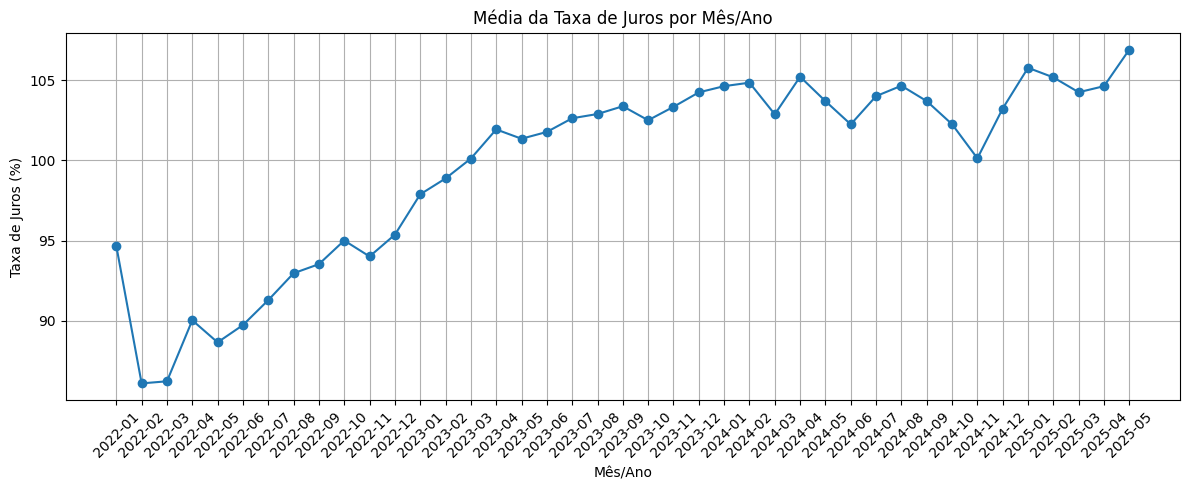

In [40]:
df['MesAno'] = pd.to_datetime(df['InicioPeriodo'], errors='coerce').dt.to_period('M')

media_por_mes = df.groupby('MesAno')['TaxaJurosAoAno'].mean().reset_index()
media_por_mes['MesAno'] = media_por_mes['MesAno'].astype(str)

# Visualização
plt.figure(figsize=(12, 5))
plt.plot(media_por_mes['MesAno'], media_por_mes['TaxaJurosAoAno'], marker='o')
plt.xticks(rotation=45)
plt.title("Média da Taxa de Juros por Mês/Ano")
plt.xlabel("Mês/Ano")
plt.ylabel("Taxa de Juros (%)")
plt.tight_layout()
plt.grid(True)
plt.show()


---
### Instituição com maior média de juros ao ano para cada ano (2022 à 2025)

In [41]:
# Garantir que as datas estejam no formato datetime
df["InicioPeriodo"] = pd.to_datetime(df["InicioPeriodo"], errors="coerce")

df["Ano"] = df["InicioPeriodo"].dt.year

media_por_ano = df.groupby(["Ano", "InstituicaoFinanceira"])["TaxaJurosAoAno"].mean().reset_index()

# Para cada ano, pegar a instituição com a maior média
top_instituicoes_ano = media_por_ano.loc[media_por_ano.groupby("Ano")["TaxaJurosAoAno"].idxmax()].sort_values(by="Ano")

top_instituicoes_ano


,Ano,InstituicaoFinanceira,TaxaJurosAoAno
30,2022,BARI CIA HIPOTECÁRIA,18465.776667
350,2023,JBCRED S.A. SCFI,1076.899824
549,2024,JBCRED S.A. SCFI,710.386456
722,2025,CREFISA S.A. CFI,734.589901


---
### Quais modalidades de crédito têm as maiores médias de taxa de juros anuais entre pessoas jurídicas.

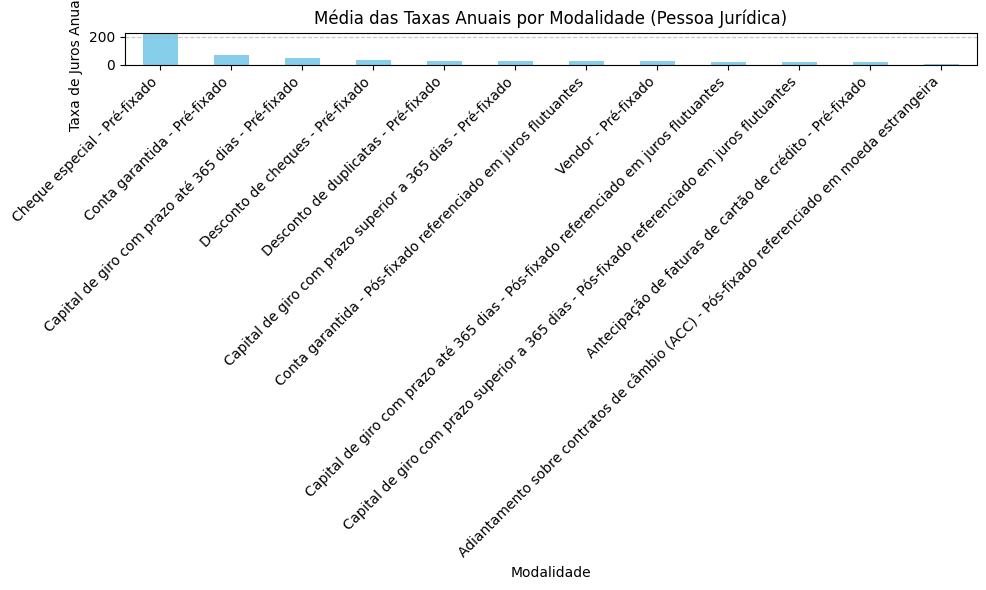

In [42]:
df_pj = df[df["Segmento"] == "Pessoa Jurídica"]

# Calcular a média da taxa anual por modalidade
media_juros_modalidade_pj = df_pj.groupby("Modalidade")["TaxaJurosAoAno"].mean().sort_values(ascending=False).round(2)

media_juros_modalidade_pj

plt.figure(figsize=(10,6))
media_juros_modalidade_pj.plot(kind='bar', color='skyblue')
plt.title("Média das Taxas Anuais por Modalidade (Pessoa Jurídica)")
plt.ylabel("Taxa de Juros Anual (%)")
plt.xlabel("Modalidade")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---
### Agrupamos os dados por mês (`AnoMes`) e calculamos a média das taxas ao mês e ao ano. Em seguida, geramos um gráfico de linha para visualizar a tendência.


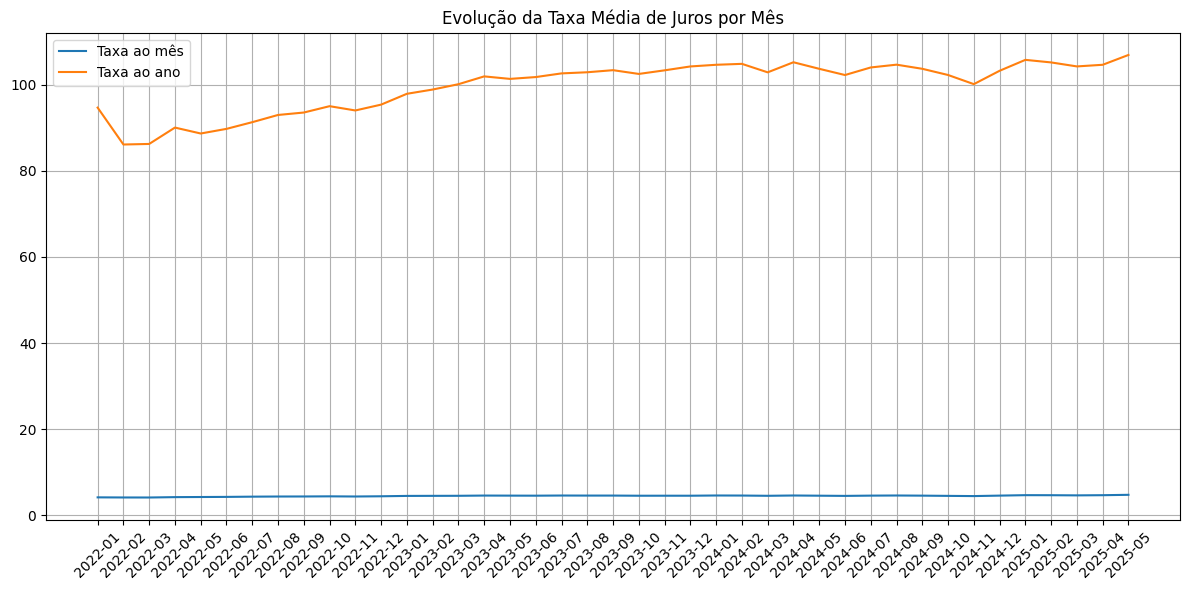

In [43]:
df_mes = df.groupby('AnoMes')[['TaxaJurosAoMes', 'TaxaJurosAoAno']].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(df_mes['AnoMes'].astype(str), df_mes['TaxaJurosAoMes'], label='Taxa ao mês')
plt.plot(df_mes['AnoMes'].astype(str), df_mes['TaxaJurosAoAno'], label='Taxa ao ano')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.title('Evolução da Taxa Média de Juros por Mês')
plt.tight_layout()
plt.show()


---
### Comparamos as taxas médias aplicadas a Pessoa Física e Jurídica, agrupadas por mês. Isso permite observar se há diferenças no comportamento das taxas por tipo de cliente.


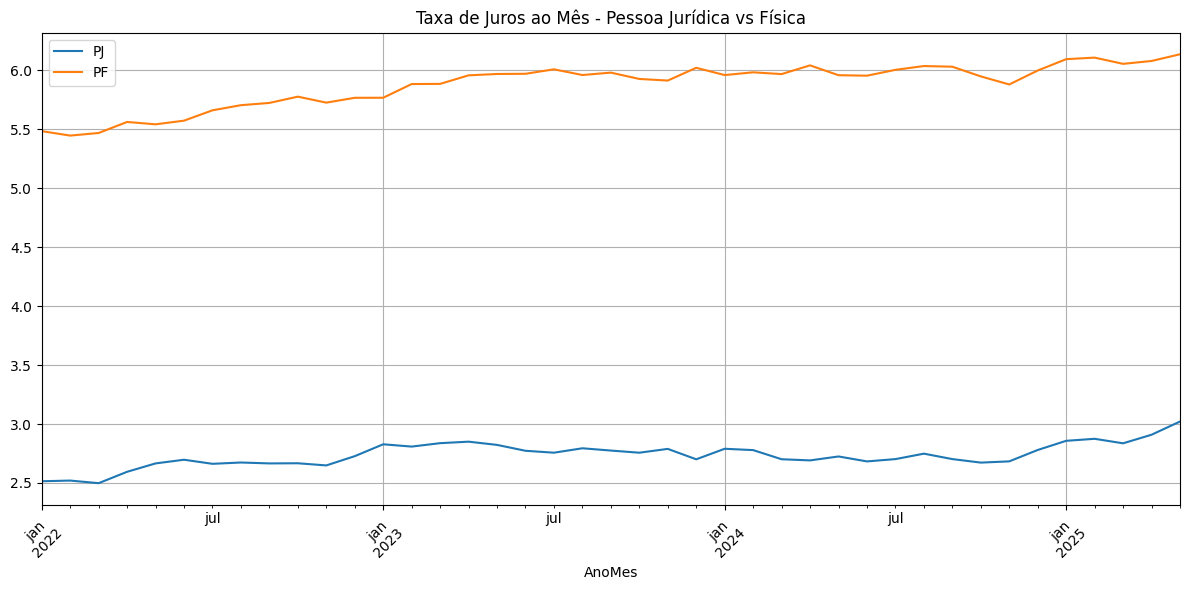

In [44]:
df['Segmento'].unique()  # verificar nomes disponíveis

df_pj = df[df['Segmento'].str.contains("Jurídica", case=False, na=False)]
df_pf = df[df['Segmento'].str.contains("Física", case=False, na=False)]

pj_pf_mes = pd.concat([
    df_pj.groupby('AnoMes')[['TaxaJurosAoMes']].mean().rename(columns={'TaxaJurosAoMes': 'PJ'}),
    df_pf.groupby('AnoMes')[['TaxaJurosAoMes']].mean().rename(columns={'TaxaJurosAoMes': 'PF'})
], axis=1)

pj_pf_mes.plot(figsize=(12,6), title='Taxa de Juros ao Mês - Pessoa Jurídica vs Física')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


---
### Identificamos as 10 modalidades de crédito mais comuns e calculamos a média das taxas ao mês e ao ano para cada uma. Essa análise permite entender quais modalidades têm maiores ou menores juros.


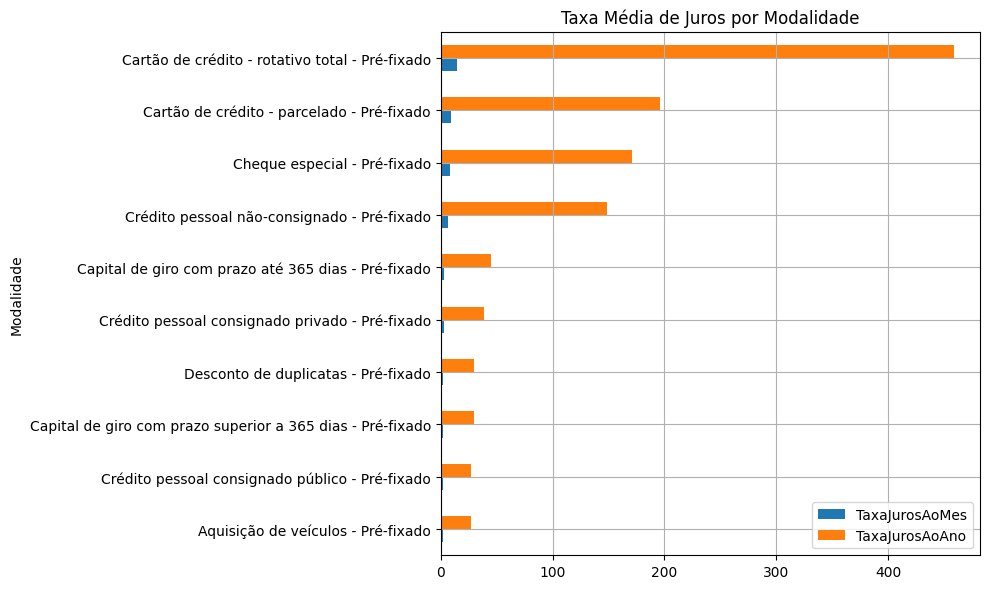

In [45]:
modal_top = df['Modalidade'].value_counts().head(10).index.tolist()
df_mod = df[df['Modalidade'].isin(modal_top)]

modal_juros = df_mod.groupby('Modalidade')[['TaxaJurosAoMes', 'TaxaJurosAoAno']].mean().sort_values(by='TaxaJurosAoAno')

modal_juros.plot(kind='barh', figsize=(10,6), title='Taxa Média de Juros por Modalidade')
plt.grid()
plt.tight_layout()
plt.show()


---
### Selecionamos as 5 instituições mais recorrentes no dataset e comparamos suas médias de taxa de juros ao mês e ao ano.


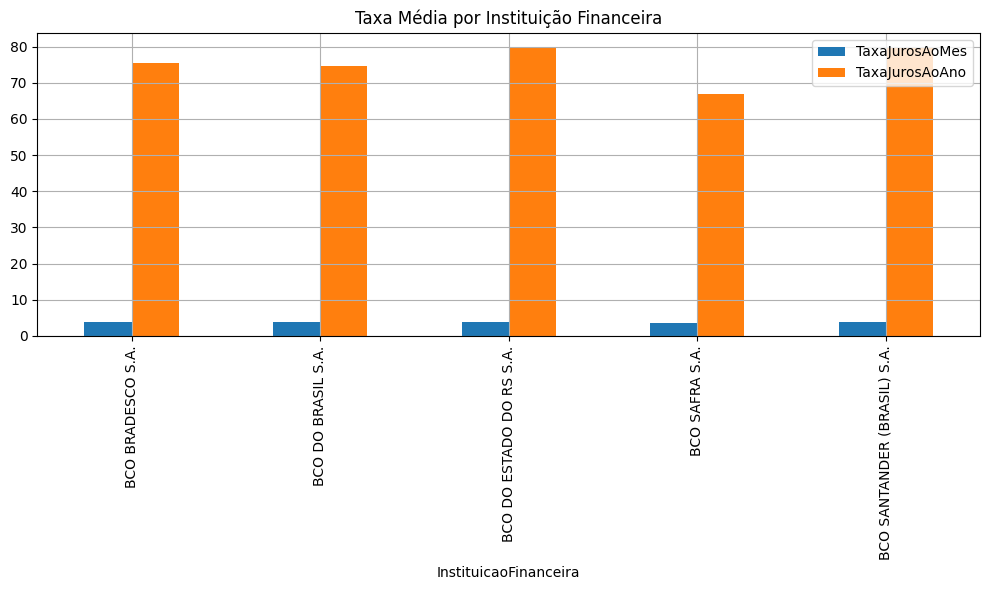

In [46]:
inst_top = df['InstituicaoFinanceira'].value_counts().head(5).index.tolist()
df_inst = df[df['InstituicaoFinanceira'].isin(inst_top)]

inst_juros = df_inst.groupby('InstituicaoFinanceira')[['TaxaJurosAoMes', 'TaxaJurosAoAno']].mean()

inst_juros.plot(kind='bar', figsize=(10,6), title='Taxa Média por Instituição Financeira')
plt.grid()
plt.tight_layout()
plt.show()


### Histograma das taxas de juros ao mês

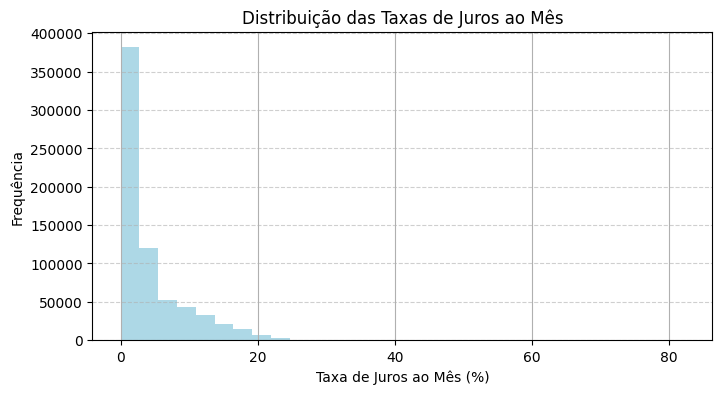

In [47]:
df["TaxaJurosAoMes"].hist(bins=30, figsize=(8,4), color="lightblue")
plt.title("Distribuição das Taxas de Juros ao Mês")
plt.xlabel("Taxa de Juros ao Mês (%)")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


---
### Gráfico da média da taxa anual por modalidade para Pessoa Jurídica

C:\Users\rihan\AppData\Local\Temp\ipykernel_8164\902189067.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


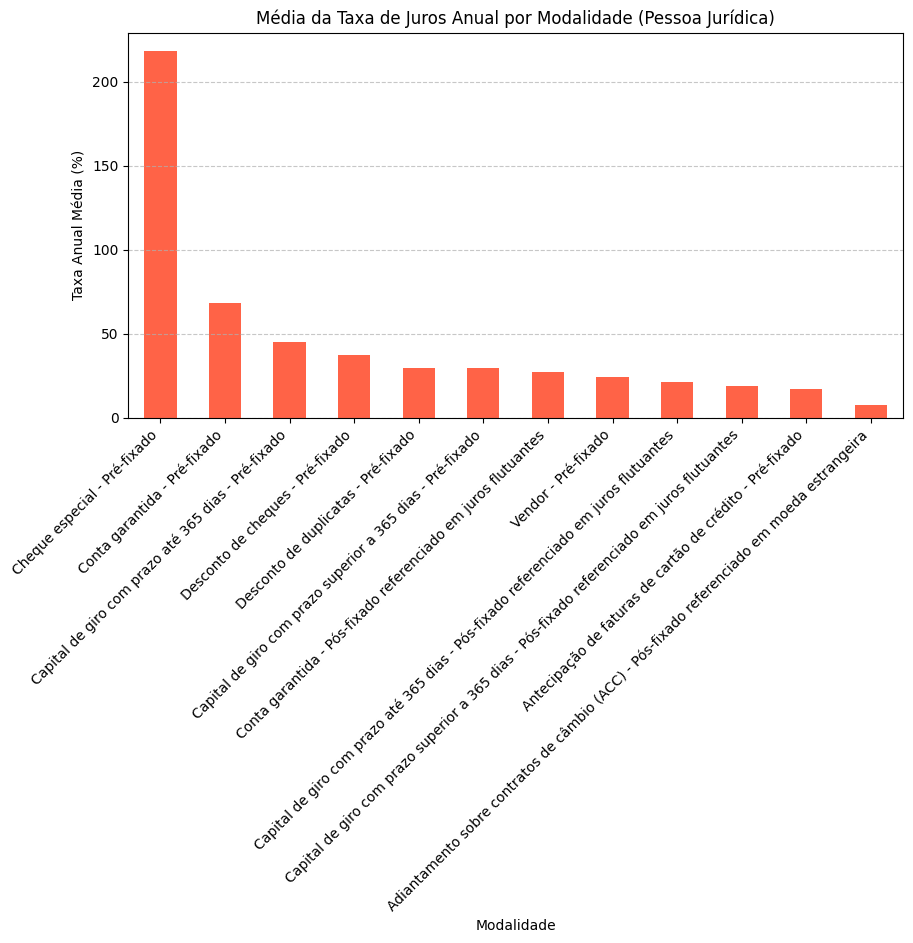

In [48]:
df_pj = df[df["Segmento"] == "Pessoa Jurídica"]
media_por_modalidade_pj = df_pj.groupby("Modalidade")["TaxaJurosAoAno"].mean().sort_values(ascending=False).round(2)

media_por_modalidade_pj.plot(kind="bar", figsize=(10,5), color="tomato")
plt.title("Média da Taxa de Juros Anual por Modalidade (Pessoa Jurídica)")
plt.xlabel("Modalidade")
plt.ylabel("Taxa Anual Média (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


---
### As 10 instituições com maiores médias de Taxa de juros ao mês

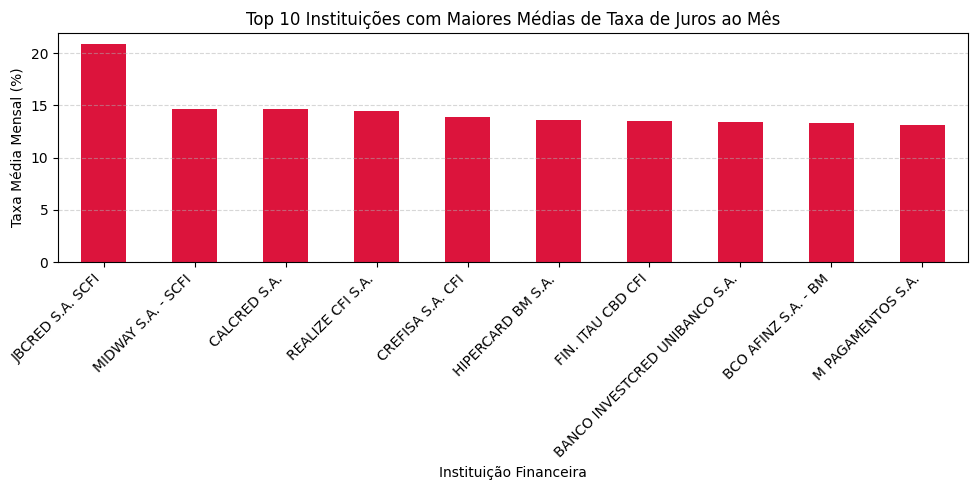

In [49]:
top10_juros_mes = df.groupby("InstituicaoFinanceira")["TaxaJurosAoMes"].mean().sort_values(ascending=False).head(10).round(2)

top10_juros_mes.plot(kind="bar", figsize=(10,5), color="crimson")
plt.title("Top 10 Instituições com Maiores Médias de Taxa de Juros ao Mês")
plt.xlabel("Instituição Financeira")
plt.ylabel("Taxa Média Mensal (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


---
### % De juros ao mês

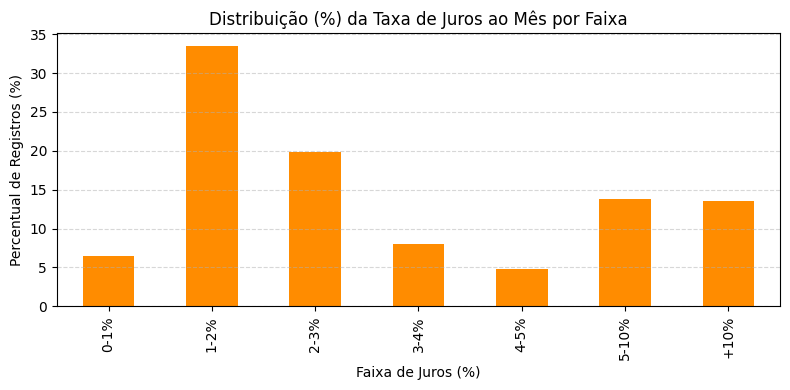

In [50]:
faixas = pd.cut(df["TaxaJurosAoMes"], bins=[0, 1, 2, 3, 4, 5, 10, 100], 
                labels=["0-1%", "1-2%", "2-3%", "3-4%", "4-5%", "5-10%", "+10%"])

distribuicao = faixas.value_counts(normalize=True).sort_index() * 100

distribuicao.plot(kind="bar", color="darkorange", figsize=(8,4))
plt.title("Distribuição (%) da Taxa de Juros ao Mês por Faixa")
plt.xlabel("Faixa de Juros (%)")
plt.ylabel("Percentual de Registros (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


---
# Conclusões

- As taxas de juros variam ao longo do tempo, acompanhando tendências econômicas.
- Pessoas Jurídicas tendem a ter taxas menores do que Pessoas Físicas.
- Modalidades como crédito consignado ou com garantia apresentam menores taxas médias.
- Há variações significativas entre instituições, reforçando a importância da comparação na escolha de crédito.

Todo o tratamento e limpeza dos dados foi necessário para padronizar formatos, remover inconsistências e permitir uma análise confiável.

---
